In [8]:
# Import necessary libraries

# pandas: Used for data manipulation and analysis. 
# It provides data structures like DataFrame for handling tabular data.
import pandas as pd

# numpy: A library for working with arrays and performing numerical operations.
import numpy as np

# train_test_split: A utility from scikit-learn to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# StandardScaler: A scikit-learn class used to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Sequential: A class from TensorFlow Keras used to build neural network models in a sequential manner.
from tensorflow.keras.models import Sequential

# Dense: A fully connected neural network layer. Each neuron receives input from all neurons of the previous layer.
from tensorflow.keras.layers import Dense

# Dropout: A regularization technique that helps prevent overfitting by randomly setting a fraction of input units to 0 during training.
from tensorflow.keras.layers import Dropout

# to_categorical: A utility to convert a class vector (integers) into a one-hot encoded vector.
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input


In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

In [3]:
# Step 1: Preprocessing the data
# Separate features and target
X = df.drop(columns=['target'])  # Assuming 'target' is the label column
y = df['target']

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Step 2: Building the ANN model
model = Sequential()

In [28]:
# Step 1: Define the input layer using Input
model.add(Input(shape=(X_train_scaled.shape[1],)))

# Step 2: Add the first hidden layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))  # No need to define the input shape here as it's already defined

# Step 3: Add a Dropout layer to prevent overfitting (drops 30% of the neurons randomly during training)
model.add(Dropout(0.3))

In [29]:
# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

In [30]:
# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  # Since it's a binary classification problem

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Step 3: Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4963 - loss: 0.7892 - val_accuracy: 0.5738 - val_loss: 0.6741
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5999 - loss: 0.6387 - val_accuracy: 0.8033 - val_loss: 0.5584
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7261 - loss: 0.5553 - val_accuracy: 0.8525 - val_loss: 0.4879
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7477 - loss: 0.5317 - val_accuracy: 0.8361 - val_loss: 0.4414
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8287 - loss: 0.4409 - val_accuracy: 0.8525 - val_loss: 0.4085
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8271 - loss: 0.4162 - val_accuracy: 0.8525 - val_loss: 0.3874
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7803 - loss: 0.4314 - val_accuracy: 0.8525 - val_loss: 0.3772
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8513 - loss: 0.3590 - val_accuracy: 0.8689 - val_loss:

In [33]:
# Step 4: Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8391 - loss: 0.9272 
Test Accuracy: 0.8524590134620667


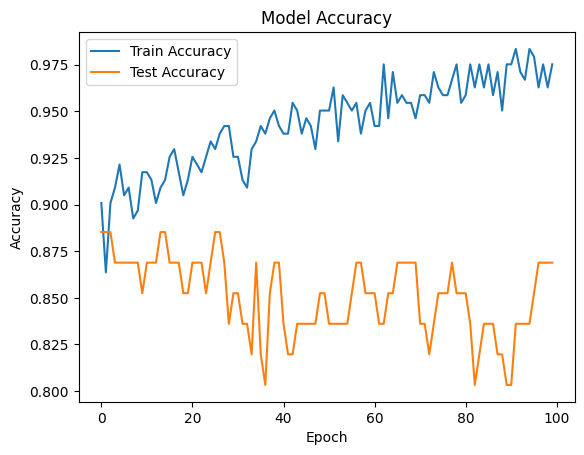

In [18]:
# Step 5: Plotting accuracy curves for training and testing
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# Step 6: Predicting for new input
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Create an input array based on the values provided
    new_input = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Step 1: Scale the new input using the same scaler used on the training data
    new_input_scaled = scaler.transform(new_input)

    # Step 2: Use the model to predict the outcome
    prediction = model.predict(new_input_scaled)

    # Step 3: Get the predicted class (0 or 1) by checking if the prediction probability is > 0.5
    predicted_class = (prediction > 0.5).astype(int)

    # Print the result
    if predicted_class[0][0] == 0:
        return "Prediction: No Heart Disease"
    else:
        return "Prediction: Heart Disease"

# Step 7: Taking user input
age = float(input("Enter age: "))
sex = int(input("Enter sex (1 = male, 0 = female): "))
cp = int(input("Enter chest pain type (0-3): "))
trestbps = float(input("Enter resting blood pressure (in mm Hg): "))
chol = float(input("Enter serum cholesterol in mg/dl: "))
fbs = int(input("Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = float(input("Enter maximum heart rate achieved: "))
exang = int(input("Enter exercise induced angina (1 = yes, 0 = no): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter slope of the peak exercise ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect): "))

# Call the prediction function with user input
result = predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
print(result)

Enter age:  65
Enter sex (1 = male, 0 = female):  1
Enter chest pain type (0-3):  1
Enter resting blood pressure (in mm Hg):  110
Enter serum cholesterol in mg/dl:  203
Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false):  1
Enter resting electrocardiographic results (0-2):  0
Enter maximum heart rate achieved:  1
Enter exercise induced angina (1 = yes, 0 = no):  1
Enter ST depression induced by exercise relative to rest:  3.1
Enter slope of the peak exercise ST segment (0-2):  1
Enter number of major vessels (0-3) colored by fluoroscopy:  0
Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect):  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction: No Heart Disease


C:\Users\Local User\desktop\python_2308\my_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
